
In <a href='https://medium.com/intellectual-explorers-club/memetic-tribes-and-culture-war-2-0-14705c43f6bb' target='_blank'>Memetic Tribes and Culture War 2.0</a>, Peter Limberg and Conor Barnes reference a Google Spreadsheet where they are compiling their data.

<figure name="7247" id="7247" class="graf graf--figure graf--layoutOutsetCenter graf-after--p" data-scroll="native">
    <img src="https://cdn-images-1.medium.com/max/1000/1*k3zWQFbKT51T96AAMdfKdA.png">
    <figcaption class="imageCaption">
        Click <a href="https://docs.google.com/spreadsheets/d/11Ov1Y1xM-LCeYSSBYZ7yPXJah2ldgFX4oIlDtdd7-Qw/edit?usp=sharing" target="_blank">here</a> to view the full chart.
    </figcaption>
</figure>

One of the columns contains lists of records from another column. I am going to convert this into a directed graph using <code>pandas</code> and <code>networkx</code>.

The easiest way to get data out of html tables on the web is to use <code>pandas</code> <code>read_html</code> function, but you have to pick through the tables in the list to see which one contains the data you want.

In [1]:

import pandas as pd

tables_url = r'https://docs.google.com/spreadsheets/d/11Ov1Y1xM-LCeYSSBYZ7yPXJah2ldgFX4oIlDtdd7-Qw'
tribes_df_list = pd.read_html(tables_url)
print(len(tribes_df_list))

2



I had to perform a lot of <a href='https://secure.i.telegraph.co.uk/multimedia/archive/02152/panda-upside-down_2152868i.jpg' target='_blank'>panda gymnastics</a> in order to clean off the husk of the Google table and get the data into a compact space.

In [2]:

tribes_df = tribes_df_list[0].dropna(axis=0, how='all').dropna(axis=1, how='all').iloc[:, 1:]
tribes_df.columns = tribes_df.iloc[0]
tribes_df = tribes_df.iloc[1:].T
tribes_df.columns = tribes_df.iloc[0]
tribes_df = tribes_df.iloc[1:].T
tribes_df.sample(3).T.sample(6).T

,SACRED VALUES,TELOS,CAMPFIRE,MASTER STATUS,MENTAL MODELS,CHIEFTAINS
MEMETIC TRIBE,,,,,,
Neoreactionaries,"Natural Order, Civilization",Restoration,"Blogosphere, Hestia Society, Unqualified Reser...",Reactionary,"The Catherdal, GNON, Cthulhu only swims left","Mencius Moldbug, Nick Land, Michael Anissimov"
Optimists,"Reason, Science, Progress","""Enlightenment Now"" (e.g. continual progress t...","Davos, Governments",Global citizen,"Skepticism, Scientific Method","Steven Pinker, Hans Rosling, Bill Gates"
Benedictines,Christian Faith,Strategetic segregation from mainstream cultur...,"The American Conservative, Churches",Traditionalist Christian,"Benedict Option, Liquid Modernity, Moralistic ...","Rod Dreher, Anthony Esolen, John Horvat II"



It's an easy matter to add the tribes into a directional graph.

In [3]:

import networkx as nx

tribes_digraph = nx.DiGraph()
attributes_dict = tribes_df.T.to_dict()
tribes_digraph.add_nodes_from(attributes_dict)
nx.set_node_attributes(tribes_digraph, values=attributes_dict)


Next is figuring out, from the combatant lists, where the edges are.

In [4]:

from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

tribe_list = tribes_df.index.tolist()
for row_index, row_value in tribes_df['COMBATANTS'].iteritems():
    combatant_list = row_value.split(', ')
    for combatant in combatant_list:
        if combatant != 'None':
            
            # The combatants are in slightly differing spellings,
            # so I need to just guess which one I mean
            this_tribe = sorted(tribe_list,
                                key=lambda tribe: similar(combatant, tribe.split(' (')[0]))[-1]
            
            tribes_digraph.add_edge(row_index, this_tribe)


I have to use Gephi to get every node away from the other edges because networkx doesn't do that well enough.

In [5]:

import os

# Export the graph into Gephi
SAVES_FOLDER = '../saves/'
file_path = os.path.join(SAVES_FOLDER, 'gexf/tribes_digraph.gexf')
nx.write_gexf(tribes_digraph, file_path)


I have decided to color the mutual combatants edge red. For this I need a list of edges that have arrows pointing both ways.

In [6]:

full_edge_list = list(tribes_digraph.edges())
double_edge_list = []
while len(full_edge_list) > 0:
    edge_tuple = full_edge_list.pop()
    doubled_tuple = (edge_tuple[1], edge_tuple[0])
    if doubled_tuple in full_edge_list:
        double_edge_list.append(edge_tuple)
        double_edge_list.append(doubled_tuple)

In [7]:

single_edge_list = []
full_edge_list = list(tribes_digraph.edges())
for edge_tuple in full_edge_list:
    if edge_tuple not in double_edge_list:
        single_edge_list.append(edge_tuple)

In [9]:

import sys

print(sys.executable)

C:\Users\577342\AppData\Local\Continuum\anaconda3\python.exe


In [10]:

ROOR_DIR = 'C:\\'
for sub_dir, dir_list, file_list in os.walk(ROOR_DIR):
    for file_name in file_list:
        if file_name == 'python.exe':
            print(os.path.join(sub_dir, file_name))

C:\Program Files\GIMP 2\32\bin\python.exe
C:\Program Files\Microsoft\ML Server\PYTHON_SERVER\python.exe
C:\Program Files\Unity\Editor\Data\PlaybackEngines\WebGLSupport\BuildTools\Emscripten_Win\python\2.7.5.3_64bit\python.exe
C:\Program Files (x86)\Microsoft SDKs\Azure\CLI2\python.exe
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\python.exe
C:\Users\577342\AppData\Local\Continuum\anaconda3\python.exe
C:\Users\577342\AppData\Local\Continuum\anaconda3\envs\Python27\python.exe
C:\Users\577342\AppData\Local\Continuum\anaconda3\pkgs\python-2.7.15-he216670_0\python.exe
C:\Users\577342\AppData\Local\Continuum\anaconda3\pkgs\python-3.6.5-h0c2934d_0\python.exe


In [11]:

for sub_dir, dir_list, file_list in os.walk(ROOR_DIR):
    for file_name in file_list:
        if file_name == 'pip.exe':
            file_path = os.path.join(sub_dir, file_name)
            print('{}: {}'.format(file_path, os.system('{} --version'.format(file_path))))

C:\Program Files\Microsoft\ML Server\PYTHON_SERVER\Scripts\pip.exe: 1
C:\Program Files\Unity\Editor\Data\PlaybackEngines\WebGLSupport\BuildTools\Emscripten_Win\python\2.7.5.3_64bit\Scripts\pip.exe: 1
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\Scripts\pip.exe: 1
C:\Users\577342\AppData\Local\Continuum\anaconda3\envs\Python27\Scripts\pip.exe: 0
C:\Users\577342\AppData\Local\Continuum\anaconda3\pkgs\pip-10.0.1-py27_0\Scripts\pip.exe: 101
C:\Users\577342\AppData\Local\Continuum\anaconda3\pkgs\pip-10.0.1-py36_0\Scripts\pip.exe: 101
C:\Users\577342\AppData\Local\Continuum\anaconda3\Scripts\pip.exe: 0


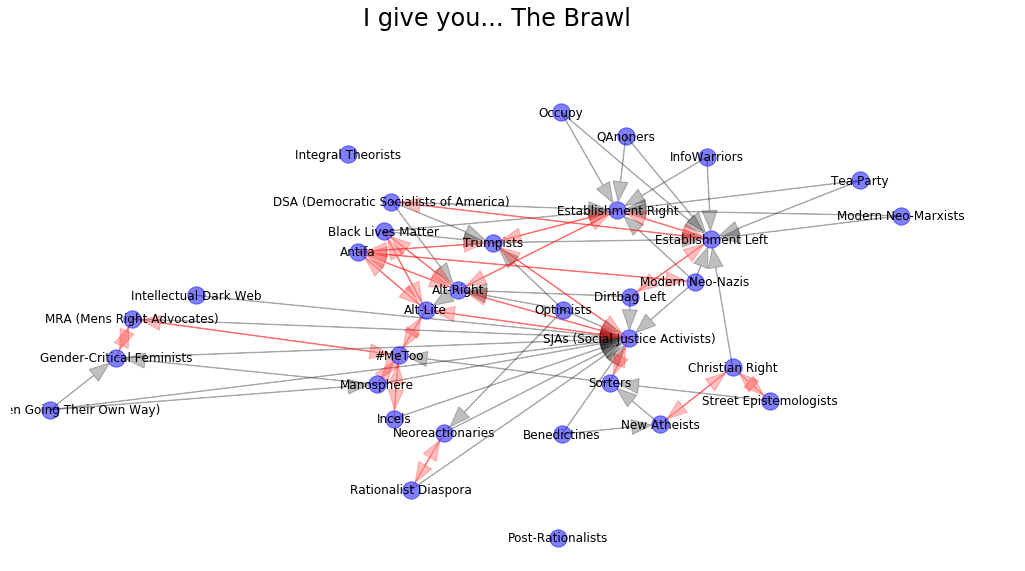

In [17]:

import xmltodict
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

# Import from Gephi
file_path = os.path.join(SAVES_FOLDER, 'gexf/tribes_digraph.gexf')
with open(file_path, 'r') as fid:
    tribal_xml = fid.read()
tribal_tree = xmltodict.parse(tribal_xml)

# Get the position dictionary for the GEXF saved from Gephi
node_dict_list = tribal_tree['gexf']['graph']['nodes']['node']
tribal_layout_dict = {node_dict['@id']: np.array([float(node_dict['viz:position']['@x']),
                                                  float(node_dict['viz:position']['@y'])]) for node_dict in node_dict_list}

# Draw the graph using the gephi layout
tribal_fig = plt.figure(figsize=(18, 9))
ax = tribal_fig.add_subplot(111)
plt.axis('off')
plt.xticks([], [])
plt.yticks([], [])
tribal_fig.suptitle('I give you... The Brawl', fontsize=24)

# Make fat arrows
arrowstyle = mpatches.ArrowStyle.Simple(head_length=2., head_width=1.5, tail_width=0.05)

# Make the nodes blue so you can make the double edges red
node_collection = nx.draw_networkx_nodes(G=tribes_digraph, pos=tribal_layout_dict, alpha=0.5, node_color='b')

# Get the double-edged edge list in red
edge_collection = nx.draw_networkx_edges(G=tribes_digraph, pos=tribal_layout_dict, alpha=0.25,
                                         arrowstyle=arrowstyle, edgelist=single_edge_list)
edge_collection = nx.draw_networkx_edges(G=tribes_digraph, pos=tribal_layout_dict, alpha=0.25,
                                         arrowstyle=arrowstyle, edgelist=double_edge_list, edge_color='r')

labels_collection = nx.draw_networkx_labels(G=tribes_digraph, pos=tribal_layout_dict, font_size=12)
axes_subplot = tribal_fig.get_axes()[0]
xlim_tuple = axes_subplot.set_xlim(left=-1500, right=1500)


It was recommended that I try nxviz. This was all I could come up with using the sparce documentation.

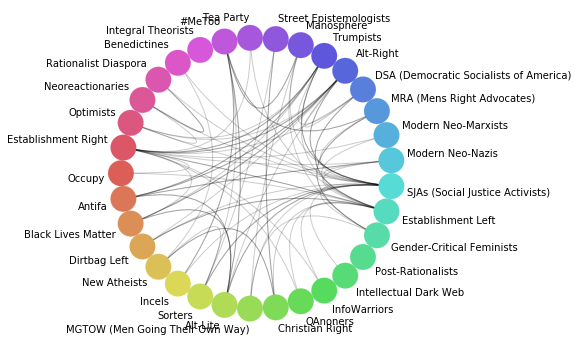

In [63]:

import nxviz

c = nxviz.CircosPlot(tribes_digraph, node_color='FOREBEARERS', node_order='FOREBEARERS', node_labels=True)
c.draw()

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

In [ ]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
HTML('Click <a href="' + notebook_viewer_url + '" target="_blank">here</a> to view notebook in nbviewer.')